In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
adata = ad.read("./mus_musculus_preprocessed_all_params_with_gtm_1000.h5ad")

In [4]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [5]:
adata.var['cast_bs'] = adata.var['cast_ksyn']/adata.var['cast_koff']
adata.var['c57_bs'] = adata.var['c57_ksyn']/adata.var['c57_koff']
adata.var['total_bs'] = adata.var['total_ksyn']/adata.var['total_koff']

adata.var['cast_bf'] = adata.var['cast_kon']
adata.var['c57_bf'] = adata.var['c57_kon']
adata.var['total_bf'] = adata.var['total_kon']

In [6]:
df = adata.var[['cast_bs', 'c57_bs', 'total_bs', 'cast_bf', 'c57_bf', 'total_bf', 'gtm_total_bs',
                'gtm_total_bf', 'gtm_cast_bs', 'gtm_cast_bf', 'gtm_c57_bs','gtm_c57_bf' ]]

In [7]:
df = df.dropna()
df

,cast_bs,c57_bs,total_bs,cast_bf,c57_bf,total_bf,gtm_total_bs,gtm_total_bf,gtm_cast_bs,gtm_cast_bf,gtm_c57_bs,gtm_c57_bf
Gene,,,,,,,,,,,,
Mrpl15,15.946756,15.743812,24.584943,0.122347,0.137540,0.175476,30.175938,0.086455,16.615584,0.074548,16.396010,0.080623
4732440D04Rik,2.716637,3.035545,3.025959,0.699138,0.779018,1.358319,19.636256,0.184956,20.533216,0.090923,26.357739,0.081355
Cops5,10.939161,20.714896,9.849518,1.147452,0.784568,2.557655,45.777937,0.497830,34.853115,0.292236,40.876105,0.275836
Arfgef1,5.884419,5.956399,3.814466,0.575572,0.562565,1.560758,10.698688,0.512663,30.295548,0.091505,18.795183,0.148841
Tram1,2.860091,3.240180,5.335522,3.621442,3.433453,4.037842,31.688989,0.618891,23.840762,0.395564,18.146082,0.591736
...,...,...,...,...,...,...,...,...,...,...,...,...
Exosc7,8.493003,8.439157,7.855627,0.615424,0.638748,1.348519,27.638682,0.326350,17.228319,0.221549,19.595044,0.227992
Lars2,4.715019,9.418359,3.433188,0.447942,0.110824,0.978933,27.854896,0.097801,27.728833,0.061037,13.557589,0.046888
Sacm1l,4.619438,5.001986,7.426186,0.405336,0.431688,0.573285,6.102013,0.438511,10.162776,0.130894,9.259375,0.157248


In [8]:
df['log_cast_bs'] = np.log10(df['cast_bs'])
df['log_cast_bf'] = np.log10(df['cast_bf'])
df['log_gtm_cast_bs'] = np.log10(df['gtm_cast_bs'])
df['log_gtm_cast_bf'] = np.log10(df['gtm_cast_bf'])

df['log_c57_bs'] = np.log10(df['c57_bs'])
df['log_c57_bf'] = np.log10(df['c57_bf'])
df['log_gtm_c57_bs'] = np.log10(df['gtm_c57_bs'])
df['log_gtm_c57_bf'] = np.log10(df['gtm_c57_bf'])

df['log_total_bs'] = np.log10(df['total_bs'])
df['log_total_bf'] = np.log10(df['total_bf'])
df['log_gtm_total_bs'] = np.log10(df['gtm_total_bs'])
df['log_gtm_total_bf'] = np.log10(df['gtm_total_bf'])

In [9]:
correlations = df.corr()
correlations['log_total_bf']['log_gtm_total_bf']

0.5870522300224187

In [10]:
correlations['log_total_bf']['log_gtm_total_bf']

0.5870522300224187

In [11]:
binwidth = 0.1
x_bins = np.arange(0,2.0, binwidth)

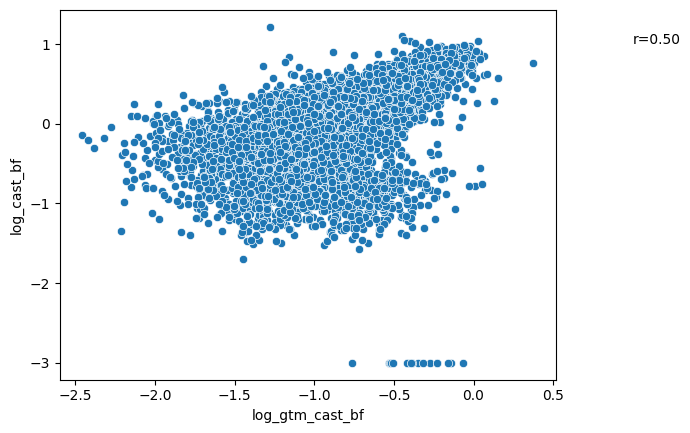

In [12]:
sns.scatterplot(data=df, x="log_gtm_cast_bf", y="log_cast_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_cast_bf']), y=np.array(df['log_cast_bf']))
plt.text(1, 1, 'r={:.2f}'.format(r))
plt.show()

In [53]:
list(range(0, 1, 01))

TypeError: 'float' object cannot be interpreted as an integer

In [73]:
df

,cast_bs,c57_bs,total_bs,cast_bf,c57_bf,total_bf,gtm_total_bs,gtm_total_bf,gtm_cast_bs,gtm_cast_bf,...,log_gtm_cast_bs,log_gtm_cast_bf,log_c57_bs,log_c57_bf,log_gtm_c57_bs,log_gtm_c57_bf,log_total_bs,log_total_bf,log_gtm_total_bs,log_gtm_total_bf
Gene,,,,,,,,,,,,,,,,,,,,,
Mrpl15,15.946756,15.743812,24.584943,0.122347,0.137540,0.175476,30.175938,0.086455,16.615584,0.074548,...,1.220516,-1.127563,1.197110,-0.861571,1.214738,-1.093542,1.390669,-0.755783,1.479661,-1.063207
4732440D04Rik,2.716637,3.035545,3.025959,0.699138,0.779018,1.358319,19.636256,0.184956,20.533216,0.090923,...,1.312457,-1.041329,0.482237,-0.108453,1.420908,-1.089618,0.480863,0.133002,1.293059,-0.732931
Cops5,10.939161,20.714896,9.849518,1.147452,0.784568,2.557655,45.777937,0.497830,34.853115,0.292236,...,1.542242,-0.534266,1.316283,-0.105369,1.611470,-0.559349,0.993415,0.407842,1.660656,-0.302919
Arfgef1,5.884419,5.956399,3.814466,0.575572,0.562565,1.560758,10.698688,0.512663,30.295548,0.091505,...,1.481379,-1.038556,0.774984,-0.249827,1.274047,-0.827279,0.581434,0.193335,1.029331,-0.290168
Tram1,2.860091,3.240180,5.335522,3.621442,3.433453,4.037842,31.688989,0.618891,23.840762,0.395564,...,1.377320,-0.402783,0.510569,0.535731,1.258783,-0.227872,0.727177,0.606149,1.500908,-0.208386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exosc7,8.493003,8.439157,7.855627,0.615424,0.638748,1.348519,27.638682,0.326350,17.228319,0.221549,...,1.236243,-0.654531,0.926299,-0.194671,1.292146,-0.642080,0.895181,0.129857,1.441517,-0.486317
Lars2,4.715019,9.418359,3.433188,0.447942,0.110824,0.978933,27.854896,0.097801,27.728833,0.061037,...,1.442932,-1.214406,0.973975,-0.955368,1.132182,-1.328940,0.535698,-0.009247,1.444902,-1.009657
Sacm1l,4.619438,5.001986,7.426186,0.405336,0.431688,0.573285,6.102013,0.438511,10.162776,0.130894,...,1.007012,-0.883080,0.699142,-0.364830,0.966582,-0.803413,0.870766,-0.241629,0.785473,-0.358020


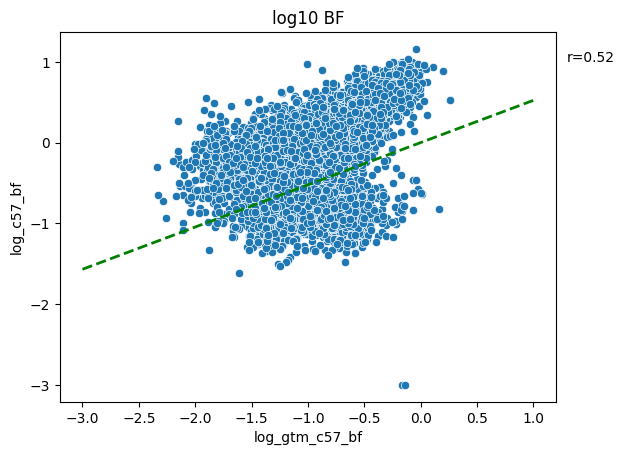

In [79]:
sns.scatterplot(data=df, x="log_gtm_c57_bf", y="log_c57_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_c57_bf']), y=np.array(df['log_c57_bf']))
#x = range(np.min(df["log_gtm_c57_bf"]), np.max(df["log_gtm_c57_bf"]))
x = [-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 1.0]
y = [element*r for element in x]
plt.plot(x, y, 'g--',linewidth=2,)
#print("".join(['pearson correlation: r=', str(r)]))
plt.text(1.3, 1, 'r={:.2f}'.format(r))
plt.title("log10 BF")
plt.savefig('BF_correlation.png', dpi=300,  bbox_inches="tight")
plt.show()

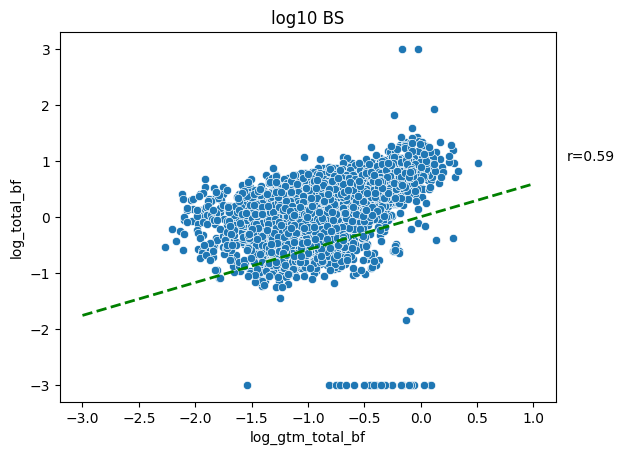

In [80]:
sns.scatterplot(data=df, x="log_gtm_total_bf", y="log_total_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_total_bf']), y=np.array(df['log_total_bf']))
x = [-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 1.0]
y = [element*r for element in x]
plt.plot(x, y, 'g--',linewidth=2,)
plt.text(1.3, 1, 'r={:.2f}'.format(r))

plt.title("log10 BS")
plt.savefig('BS_correlation.png', dpi=300, bbox_inches="tight")

plt.show()

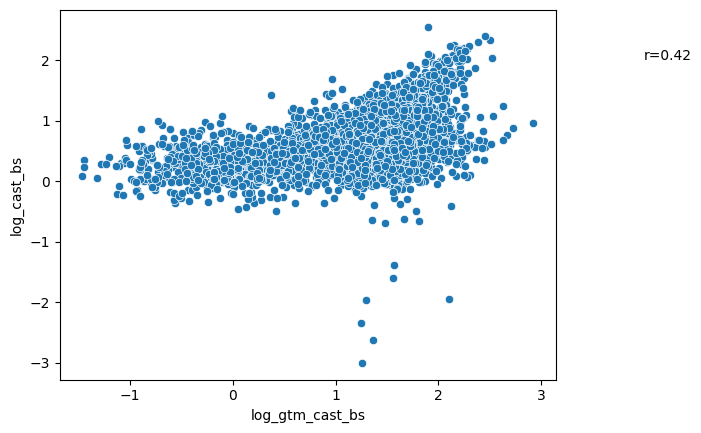

In [15]:
sns.scatterplot(data=df, x="log_gtm_cast_bs", y="log_cast_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_cast_bs']), y=np.array(df['log_cast_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()

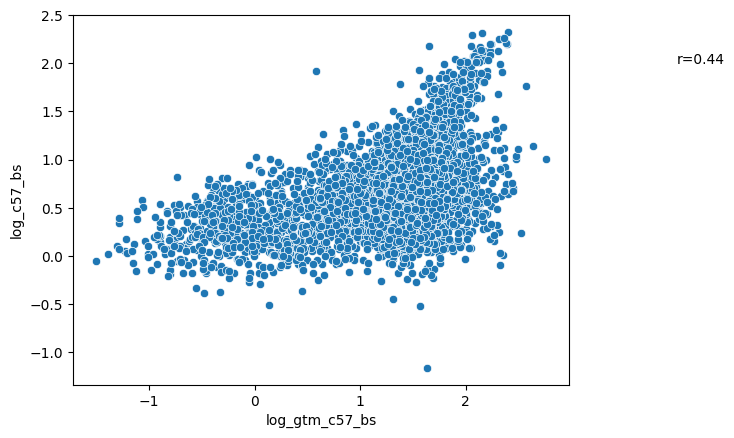

In [16]:
sns.scatterplot(data=df, x="log_gtm_c57_bs", y="log_c57_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_c57_bs']), y=np.array(df['log_c57_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()

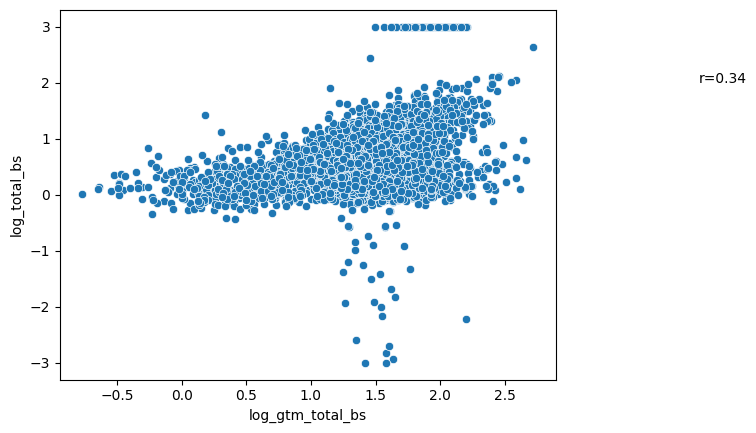

In [17]:
sns.scatterplot(data=df, x="log_gtm_total_bs", y="log_total_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_total_bs']), y=np.array(df['log_total_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()

In [20]:
df.columns

Index(['cast_bs', 'c57_bs', 'total_bs', 'cast_bf', 'c57_bf', 'total_bf',
       'gtm_total_bs', 'gtm_total_bf', 'gtm_cast_bs', 'gtm_cast_bf',
       'gtm_c57_bs', 'gtm_c57_bf', 'log_cast_bs', 'log_cast_bf',
       'log_gtm_cast_bs', 'log_gtm_cast_bf', 'log_c57_bs', 'log_c57_bf',
       'log_gtm_c57_bs', 'log_gtm_c57_bf', 'log_total_bs', 'log_total_bf',
       'log_gtm_total_bs', 'log_gtm_total_bf'],
      dtype='object')

In [21]:
df2 = pd.DataFrame()
df2['gtm_c57_bs'] = df['gtm_c57_bs']
df2['gtm_c57_bf'] = df['gtm_c57_bf']
df2['gtm_cast_bs'] = df['gtm_cast_bs']
df2['gtm_cast_bf'] = df['gtm_cast_bf']
df2['gtm_total_bs'] = df['gtm_total_bs']
df2['gtm_total_bf'] = df['gtm_total_bf']

In [35]:
row_colors= ['blue']*len(df.index.tolist())
row_colors[df.index.tolist().index('Fos')] = 'orange'
row_colors[df.index.tolist().index('Fos')] = 'orange'

#sns.clustermap(df2, cmap="viridis", metric="cosine", method="average", z_score=None, col_cluster=False, row_colors=row_colors)

#plt.savefig("clustermap_GTM.png", bbox_inches="tight")

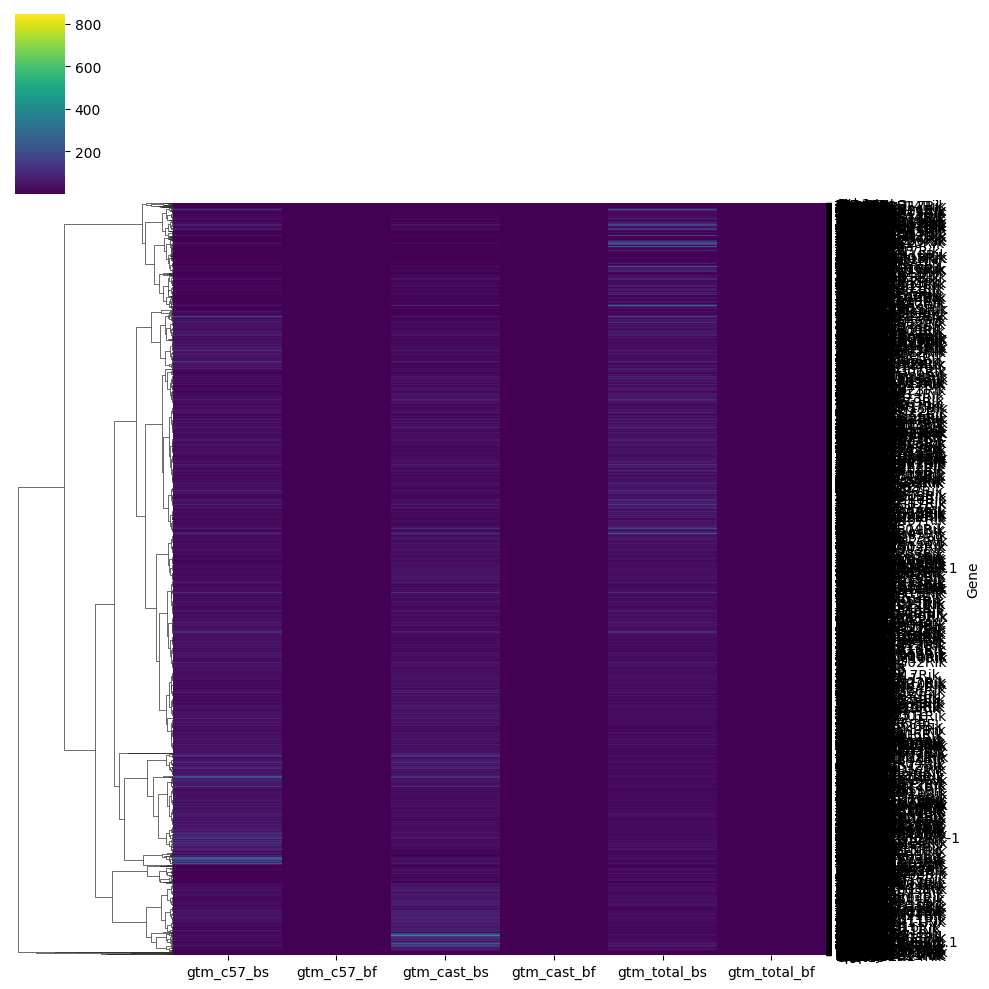

In [38]:
sns.clustermap(df2, cmap="viridis", metric="cosine",
               method="average", z_score=None,
               col_cluster=False,  yticklabels=True)

plt.savefig("clustermap_GTM.pdf", bbox_inches="tight")

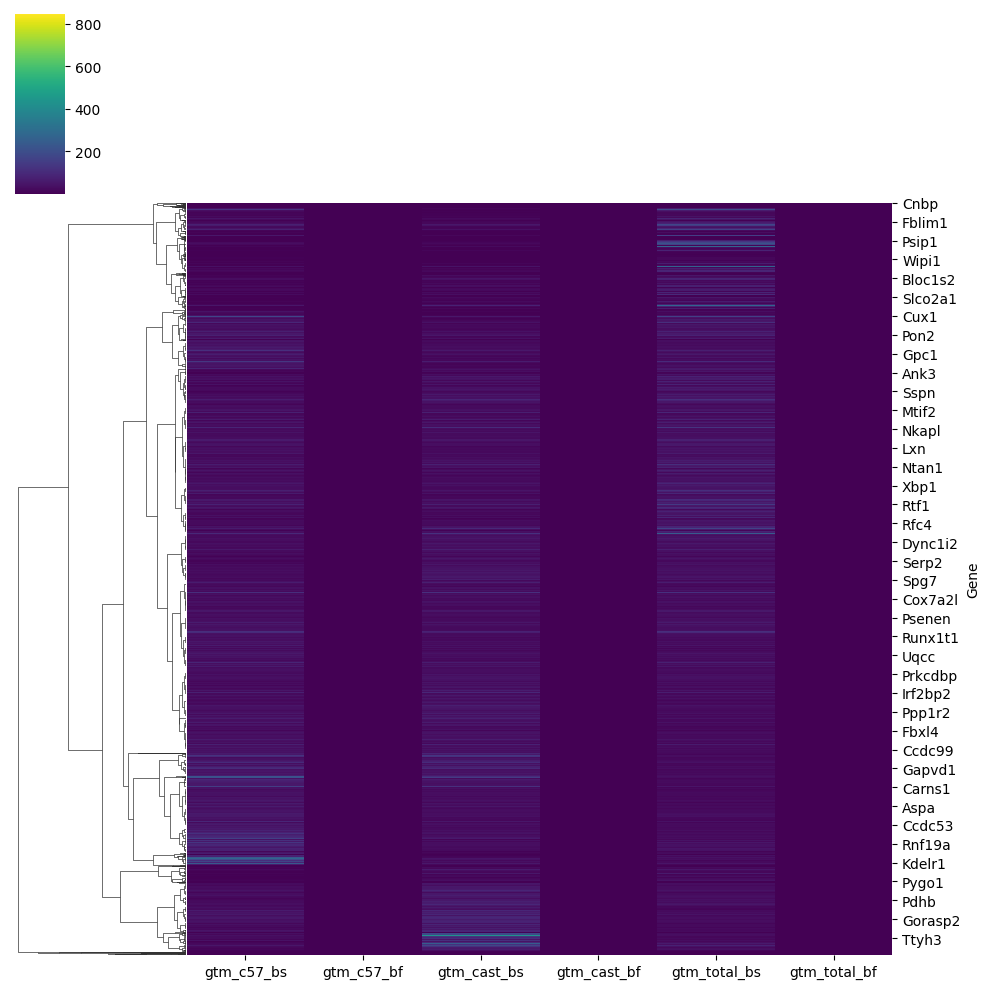

In [40]:
sns.clustermap(df2, cmap="viridis", metric="cosine",
               method="average", z_score=None,
               col_cluster=False)

plt.savefig("clustermap_GTM2.png", bbox_inches="tight")

1673

In [ ]:
df= pd.DataFrame()
df['burst frequency c57'] = adata.var['c57_kon']/np.max(adata.var['c57_kon'])
df['burst frequency cast'] = adata.var['cast_kon']/np.max(adata.var['cast_kon'])

df['burst size cast'] = adata.var['cast_ksyn']/adata.var['cast_koff']
df['burst size cast'] = df['burst size cast']/np.max(df['burst size cast'])

df['burst size c57'] = adata.var['c57_ksyn']/adata.var['c57_koff']
df['burst size c57'] = df['burst size c57']/np.max(df['burst size c57'])

df['burst frequency biallelic'] = adata.var['total_kon']/np.max(adata.var['total_kon'])
df['burst size biallelic'] = adata.var['total_ksyn']/adata.var['total_koff']
df['burst size biallelic'] = df['burst size biallelic']/np.max(df['burst size biallelic'])

df= df.transpose()
label = []
for column, values in df.iteritems():
    value_status = 'keep'
    for element in values: 
        if np.isnan(element):
            value_status = 'remove'
            
    label.append(value_status)
df= df.transpose()
df['label'] = label
#print(df.shape)
df = df[df['label']=='keep']
del df['label']
#df
#del df['total_kon']
sns.clustermap(df, cmap="viridis", metric="cosine", method="average", z_score=None, col_cluster=False)
plt.savefig("clustermap_CPM.png", bbox_inches="tight")